#### 2.1. Обучение моделей из sklearn для решения задачи регрессии и оценка качества по выбранным метрикам.

0. Подключим необходимые модули

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

1. Загрузим датасет и посмотрим, что он из себя представляет

In [2]:
honey_df = pd.read_csv("datasets/honey_purity_dataset.csv")
# Т.к. датасет большой (247903 строк), то уменьшим их количество для ускорения обучения (может влиять на качество).
#honey_df = honey_df.sample(n=10000, random_state=42)
honey_df.head()

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,432.62


Посмотрим информацию о датасете

In [3]:
print(honey_df.info())
honey_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247903 entries, 0 to 247902
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CS               247903 non-null  float64
 1   Density          247903 non-null  float64
 2   WC               247903 non-null  float64
 3   pH               247903 non-null  float64
 4   EC               247903 non-null  float64
 5   F                247903 non-null  float64
 6   G                247903 non-null  float64
 7   Pollen_analysis  247903 non-null  object 
 8   Viscosity        247903 non-null  float64
 9   Purity           247903 non-null  float64
 10  Price            247903 non-null  float64
dtypes: float64(10), object(1)
memory usage: 20.8+ MB
None


,CS,Density,WC,pH,EC,F,G,Viscosity,Purity,Price
count,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000
mean,5.500259,1.535523,18.502625,4.996047,0.799974,34.970573,32.501006,5752.893888,0.824471,594.807644
std,2.593947,0.187824,3.748635,1.444060,0.057911,8.655898,7.226290,2455.739903,0.139417,233.627972
min,1.000000,1.210000,12.000000,2.500000,0.700000,20.000000,20.000000,1500.050000,0.610000,128.720000
25%,3.260000,1.370000,15.260000,3.750000,0.750000,27.460000,26.230000,3627.880000,0.660000,433.000000
50%,5.500000,1.540000,18.510000,4.990000,0.800000,34.970000,32.490000,5753.770000,0.820000,612.960000
75%,7.740000,1.700000,21.750000,6.250000,0.850000,42.470000,38.760000,7886.650000,0.970000,770.220000
max,10.000000,1.860000,25.000000,7.500000,0.900000,50.000000,45.000000,9999.970000,1.000000,976.690000


Посмотрим сколько у нас null столбцев

In [4]:
honey_df.isnull().sum()

CS                 0
Density            0
WC                 0
pH                 0
EC                 0
F                  0
G                  0
Pollen_analysis    0
Viscosity          0
Purity             0
Price              0
dtype: int64

Посмотрим сколько у нас повторяющихся строк

In [5]:
honey_df.duplicated().sum()

np.int64(0)

Посмотрим информацию о категориальных данных

In [6]:
print(honey_df['Pollen_analysis'].value_counts())

Pollen_analysis
Eucalyptus        13194
Avocado           13191
Heather           13187
Thyme             13156
Sunflower         13148
Sage              13117
Blueberry         13106
Lavender          13086
Alfalfa           13049
Buckwheat         13036
Chestnut          13020
Wildflower        13016
Manuka            13003
Borage            13000
Orange Blossom    12992
Acacia            12976
Rosemary          12930
Clover            12910
Tupelo            12786
Name: count, dtype: int64


2. Сделаем минимально необходимую обработку и обучим модели: 

In [7]:

pollen_analysis = pd.get_dummies(honey_df['Pollen_analysis'], drop_first=True)

onehot_honey_df = pd.concat([honey_df.drop('Pollen_analysis', axis=1), pollen_analysis], axis=1)


onehot_honey_df.head()

,CS,Density,WC,pH,EC,F,G,Viscosity,Purity,Price,...,Heather,Lavender,Manuka,Orange Blossom,Rosemary,Sage,Sunflower,Thyme,Tupelo,Wildflower
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,4844.50,0.68,645.24,...,False,False,False,False,False,False,False,False,False,False
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,6689.02,0.89,385.85,...,False,False,False,False,False,False,False,False,False,False
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,6883.60,0.66,639.64,...,False,False,False,False,False,False,False,False,False,False
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,7167.56,1.00,946.46,...,False,False,False,False,False,False,False,False,False,False
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,5125.44,1.00,432.62,...,False,False,False,False,False,False,False,False,False,False


Разделим датафрейм на features и target, а также train и test

In [8]:
honey_X = onehot_honey_df.drop(['Purity', 'Price'], axis=1)
honey_y = onehot_honey_df[['Purity', 'Price']]

honey_X_train, honey_X_test, honey_y_train, honey_y_test = train_test_split(
    honey_X,
    honey_y,
    test_size=0.2,
    random_state=42
)

Кросс-валидация

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate


scoring = {
    'neg_mse': 'neg_mean_squared_error',
    'neg_rmse': 'neg_root_mean_squared_error', 
    'neg_mae': 'neg_mean_absolute_error',   
    'r2' : 'r2',  
}

model = LinearRegression()

results = {}

for model_name in ['Purity', 'Price']:
    cv_results = cross_validate(
        model,
        honey_X_train,
        honey_y_train[model_name],
        return_estimator=True,
        scoring=scoring,
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    results[model_name] = cv_results
    results_df = pd.DataFrame(cv_results)
    print(f"\nРезультаты кросс-валидации для {model_name} модели:")
    print(results_df)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Результаты кросс-валидации для Purity модели:
   fit_time  score_time           estimator  test_neg_mse  test_neg_rmse  \
0  0.435694    0.026779  LinearRegression()     -0.018076      -0.134447   
1  0.458869    0.026606  LinearRegression()     -0.018014      -0.134218   
2  0.481852    0.016990  LinearRegression()     -0.018151      -0.134724   
3  0.474885    0.019607  LinearRegression()     -0.018045      -0.134331   
4  0.466134    0.006624  LinearRegression()     -0.017993      -0.134140   

   test_neg_mae   test_r2  
0     -0.119016  0.070434  
1     -0.118836  0.073881  
2     -0.119503  0.071708  
3     -0.119047  0.071720  
4     -0.118690  0.071429  

Результаты кросс-валидации для Price модели:
   fit_time  score_time           estimator  test_neg_mse  test_neg_rmse  \
0  0.497425    0.008559  LinearRegression() -10687.608503    -103.380890   
1  0.475662    0.023162  LinearRegression() -10665.301264    -103.272945   
2  0.452258    0.023930  LinearRegression() -10777.487

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished


Посмотрим результат на тестовой выборке, усреднив результат всех моделей

In [10]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

preds = {}

for model_name in ['Purity', 'Price']:
    all_preds = []
    for model in results[model_name]['estimator']:
        pred = model.predict(honey_X_test)
        all_preds.append(pred)
    preds[model_name] = np.mean(all_preds, axis=0)
    
print("Test_score Purity:")
print('r2:', r2_score(honey_y_test['Purity'], preds['Purity']))
print('mse:', mean_squared_error(honey_y_test['Purity'], preds['Purity']))
print('rmse:', np.sqrt(mean_squared_error(honey_y_test['Purity'], preds['Purity'])))
print('mae:', mean_absolute_error(honey_y_test['Purity'], preds['Purity']))

print("\nTest_score Price:")
print('r2:', r2_score(honey_y_test['Price'], preds['Price']))
print('mse:', mean_squared_error(honey_y_test['Price'], preds['Price']))
print('rmse:', np.sqrt(mean_squared_error(honey_y_test['Price'], preds['Price'])))
print('mae:', mean_absolute_error(honey_y_test['Price'], preds['Price']))

Test_score Purity:
r2: 0.07336654017472932
mse: 0.017948066141850634
rmse: 0.13397039278083286
mae: 0.11840150302996072

Test_score Price:
r2: 0.8049028089436442
mse: 10616.82980247592
rmse: 103.03800173953259
mae: 85.89541311012346


| Метрика         | Purity (Чистота)               | Price (Цена)                 |
|-----------------|--------------------------------|------------------------------|
| R² (коэффициент детерминации) | 0.07337                       | 0.80490                      |
| MSE (среднеквадратическая ошибка) | 0.01795                 | 10616.83                     |
| RMSE (корень из MSE)      | 0.13397                       | 103.03800                    |
| MAE (средняя абсолютная ошибка)  | 0.11840                       | 85.89541                     |

### 3. Улучшение бейзлайна

#### 3.2. Задача регрессии

Проведем более детальный анализ датасета

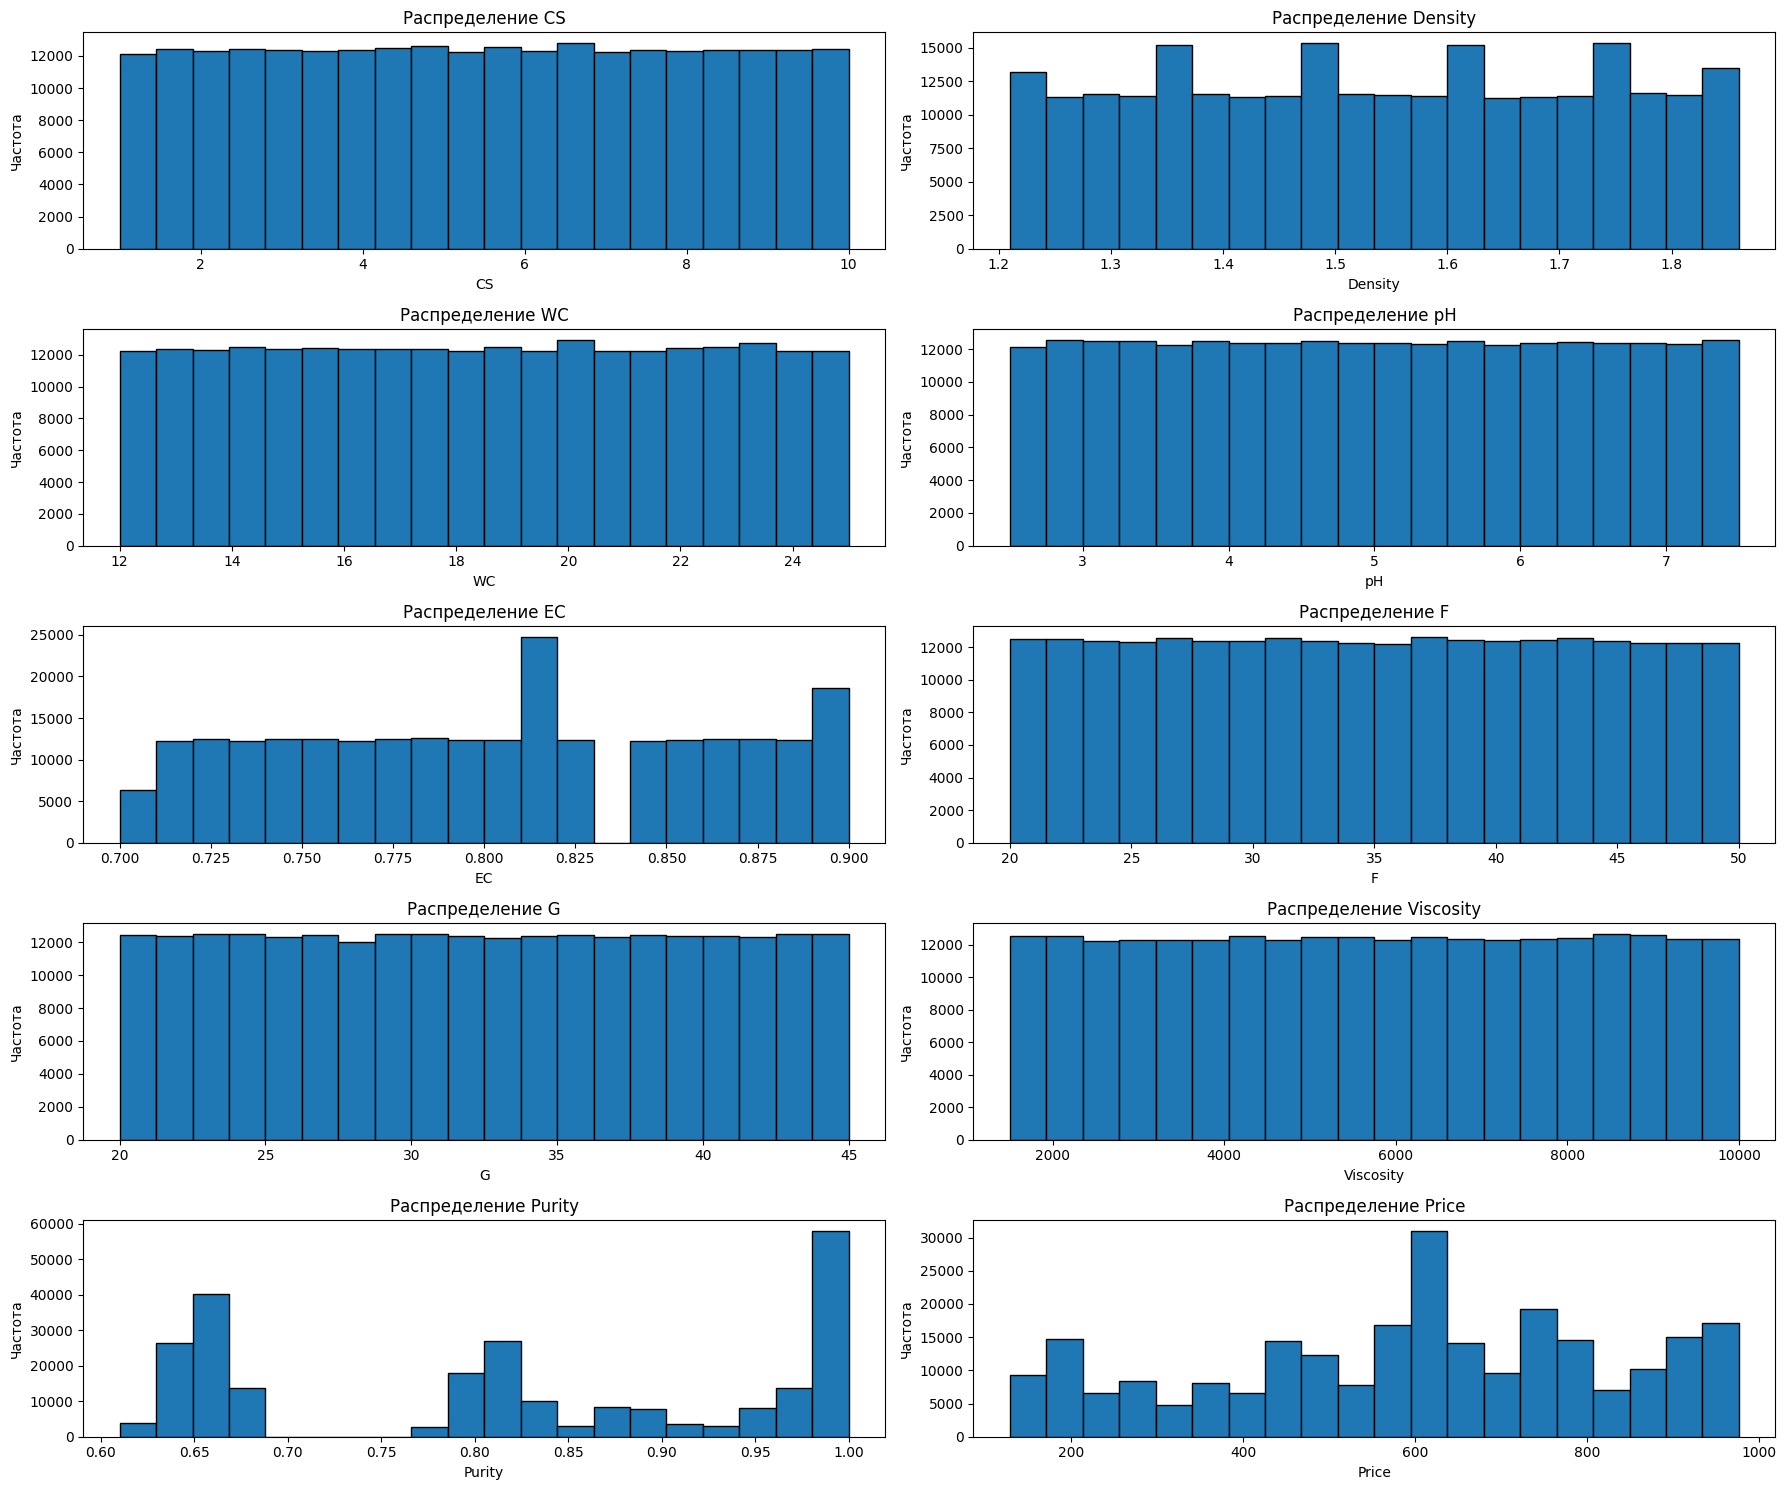

In [11]:
from matplotlib import pyplot as plt


num_cols = ['CS', 'Density', 'WC', 'pH', 'EC', 'F', 'G', 'Viscosity', 'Purity', 'Price']
cat_cols = ['Pollen_analysis']

fig, axes = plt.subplots(5, 2, figsize=(18, 15))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    axes[i].hist(honey_df[col], bins=20, edgecolor='black')
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.show()

Посмотрим есть ли выбросы

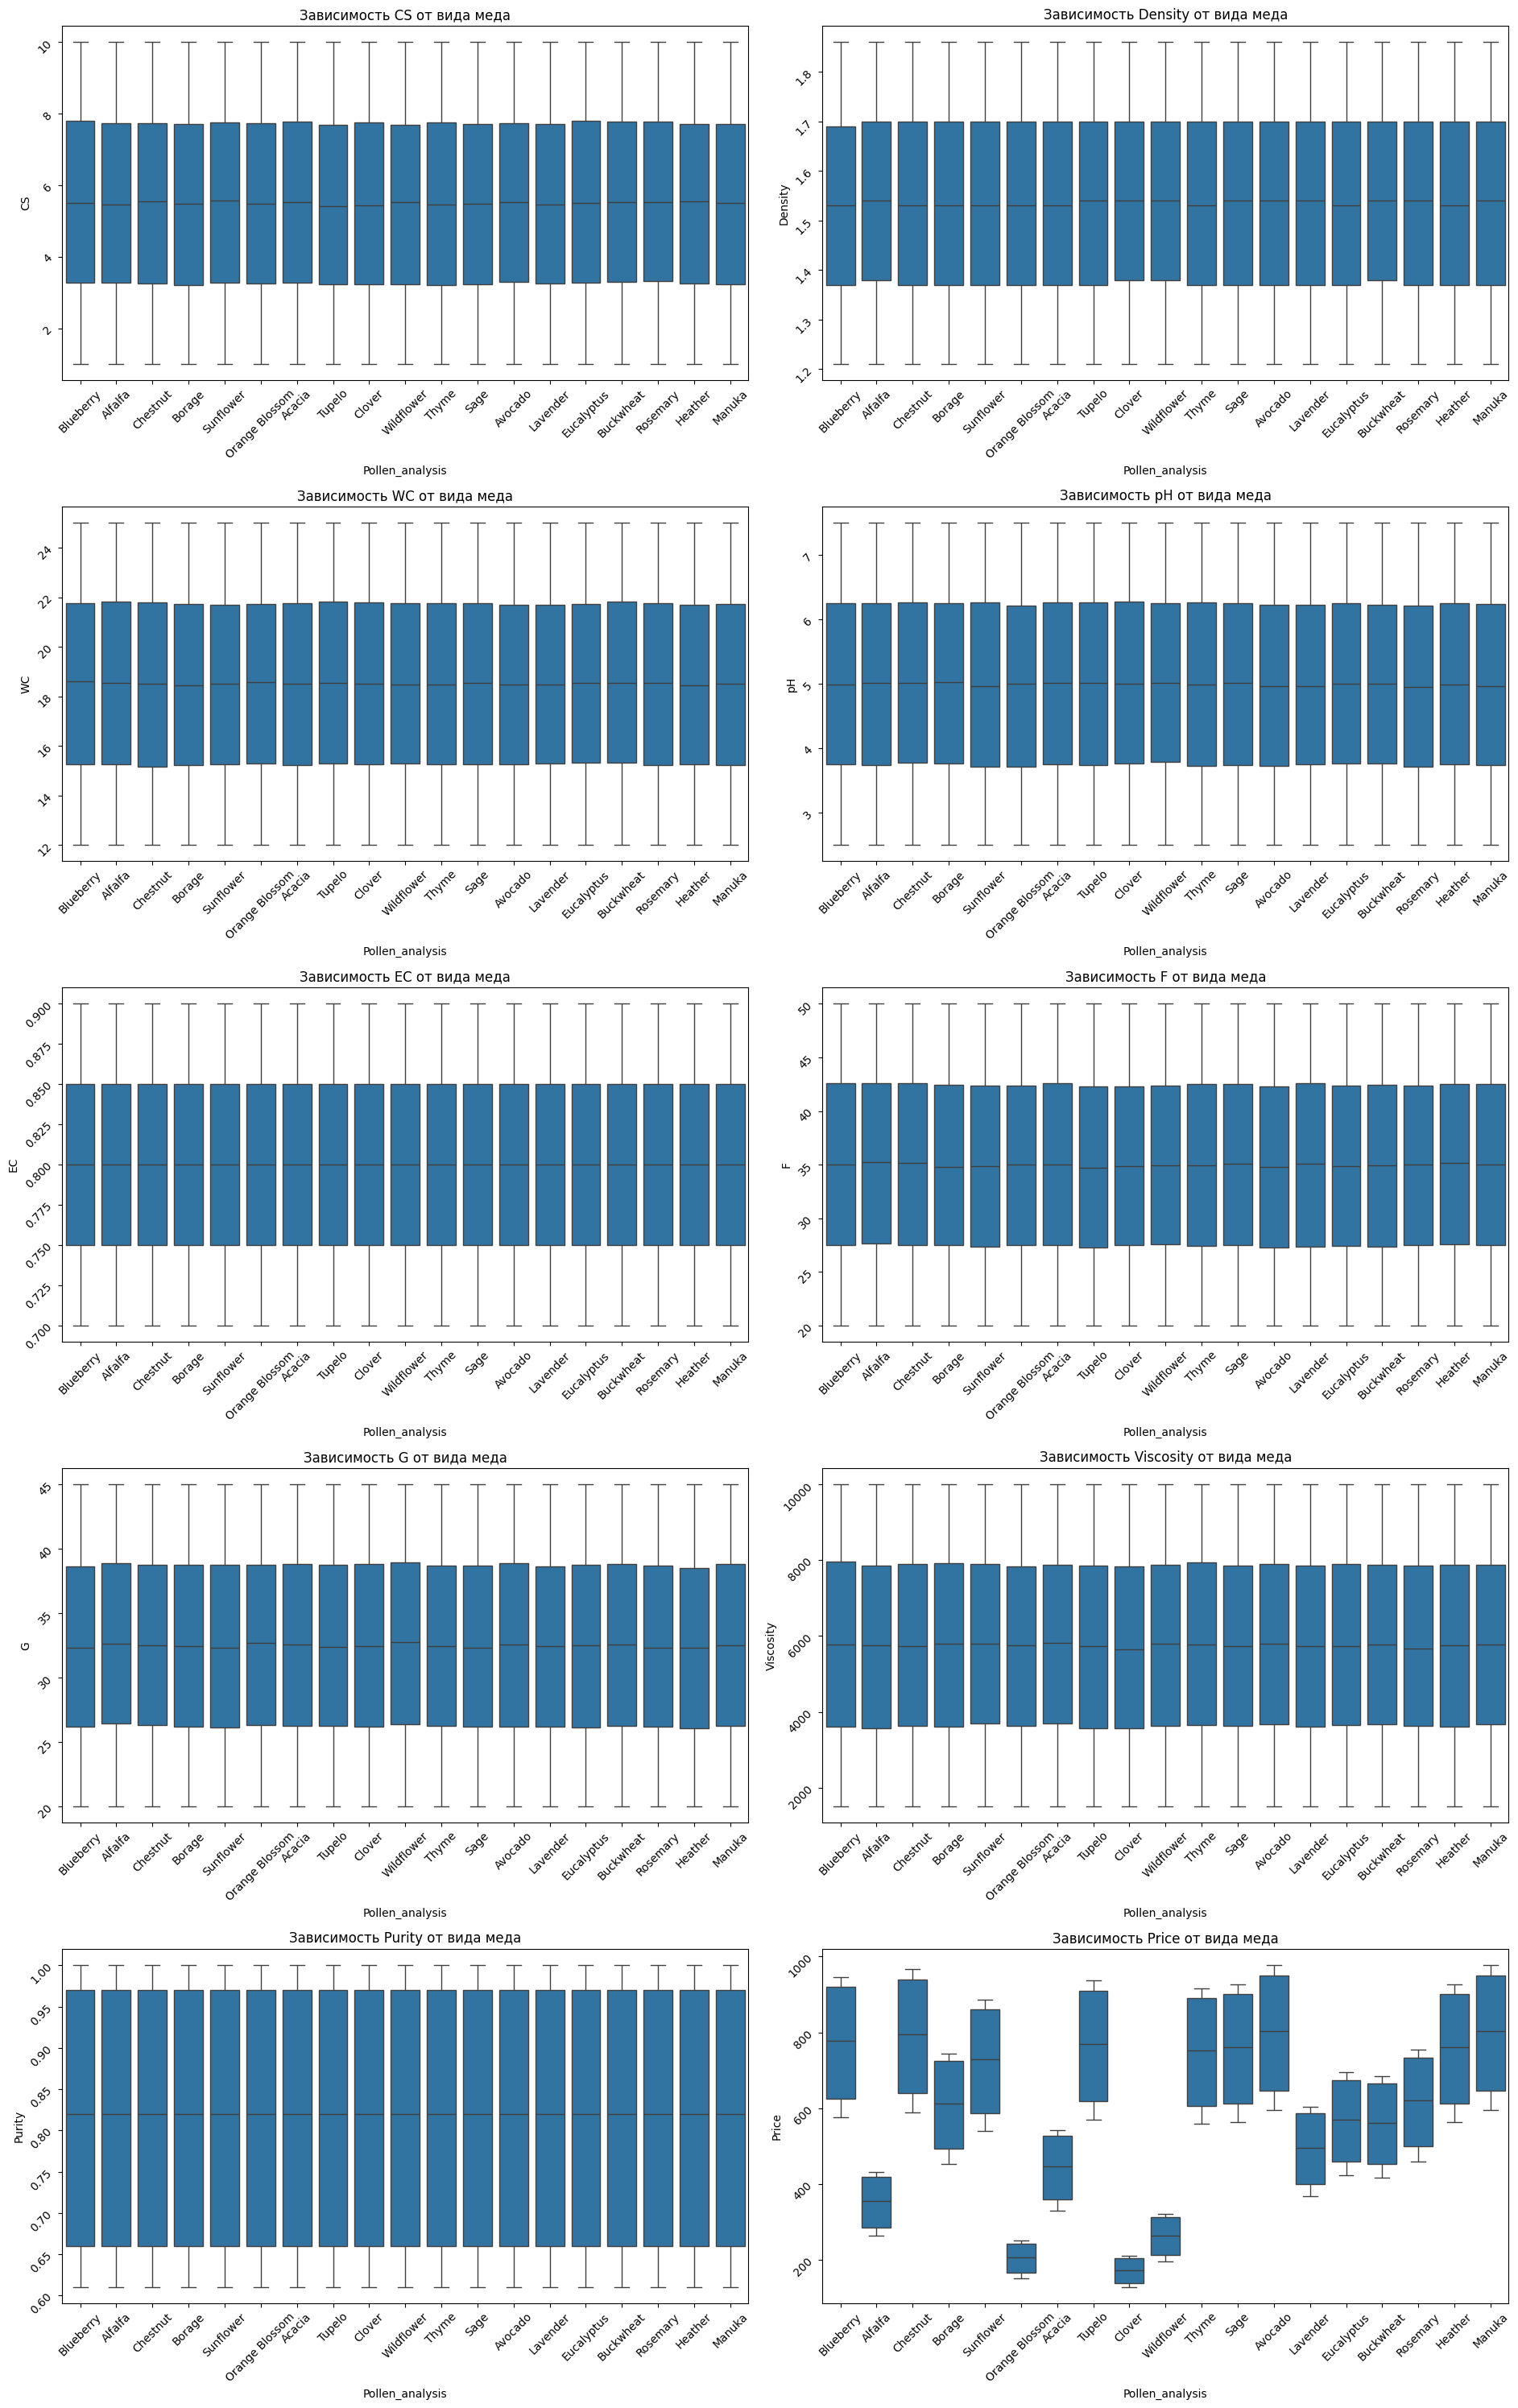

In [12]:
import seaborn as sns


fig, axes = plt.subplots(5, 2, figsize=(19, 30))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    sns.boxplot(x='Pollen_analysis', y=col, data=honey_df, ax=axes[i])
    axes[i].set_title(f'Зависимость {col} от вида меда')
    axes[i].tick_params(rotation=45)

plt.tight_layout()
plt.show()

Выбросов нет

Посмотрим корреляцию

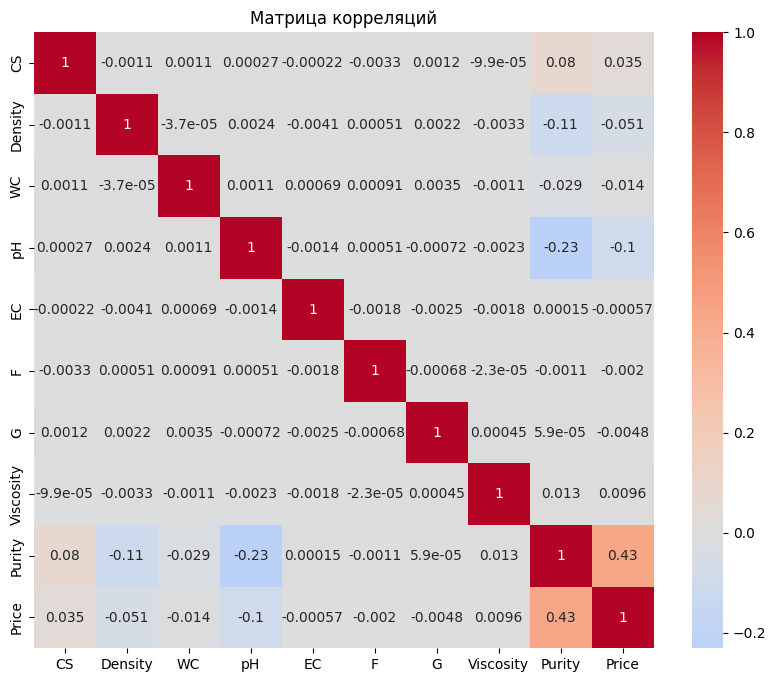

In [13]:
num_df = honey_df.select_dtypes(include=[np.number])
corr_matrix = num_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')
plt.show()

Начнем создавать новые features

Числовые фичи

In [14]:
def create_num_features(df):
    new_df = df.copy()
    new_df['CS*Density'] = df['CS'] * df['Density']
    new_df['pH*EC'] = df['pH'] * df['EC']
    new_df['F/G'] = df['F'] / (df['G'] + 1e-9)
    new_df['WC*pH'] = df['WC'] * df['pH']
    new_df['Density*Viscosity/WC'] = df['Density'] * df['Viscosity'] / (df['WC'] + 1e-9)
    new_df['G/F'] = df['G'] / (df['F'] + 1e-9)
    new_df['EC/pH'] = df['EC'] / (df['pH'] + 1e-9)
    new_df['F+G'] = df['F'] + df['G']
    new_df['F/G'] = df['F'] / df['G']
    new_df['F*G/WC'] = df['F'] * df['G'] / (df['WC'] + 1e-9)
    new_df['log_Viscosity'] = np.log1p(df['Viscosity'])
    new_df['log_Total_Sugars'] = np.log1p(df['F'] + df['G'])
    new_df['pH_deviation_ideal'] = abs(df['pH'] - 4.0)
    new_df['WC_deviation_ideal'] = abs(df['WC'] - 18.6)
    new_df['Density_deviation'] = abs(df['Density'] - 1.42)
    new_df['log1p(CS*Density*WC*pH*EC*F*G*Viscosity)'] = np.log1p(df['CS'] * df['Density'] * df['WC'] * df['pH'] * df['EC'] * df['F'] * df['G'] * df['Viscosity'])
    for col in ['CS', 'Density', 'WC', 'pH', 'EC', 'F', 'G', 'Viscosity']:
        new_df[f'{col}_to_mean'] = df[col] / df[col].mean()
        
    return new_df

Создадим категориальные фичи

In [15]:
def create_cat_features(df):
    new_df = df.copy()
    new_df['WC_Category'] = pd.cut(df['WC'], 
                           bins=[12, 17, 19, 25],
                           labels=['low', 'medium', 'high'])
    new_df['Density_Category'] = pd.cut(df['Density'],
                                bins=[1.21, 1.45, 1.65, 1.86],
                                labels=['light', 'medium', 'dense'])
    new_df['pH_Category'] = pd.cut(df['pH'],
                           bins=[2.5, 3.9, 5.1, 7.5],
                           labels=['acidic', 'normal', 'alkaline'])
    
    cat_cols = ['Pollen_analysis', 'WC_Category', 'Density_Category', 'pH_Category']

    for col in cat_cols:
        dummies = pd.get_dummies(new_df[col], prefix=col, dtype=int, drop_first=True)
        new_df = pd.concat([new_df, dummies], axis=1)
    new_df = new_df.drop(columns=cat_cols)
    
    return new_df
    

Применим функции выше и построим матрицу корреляций

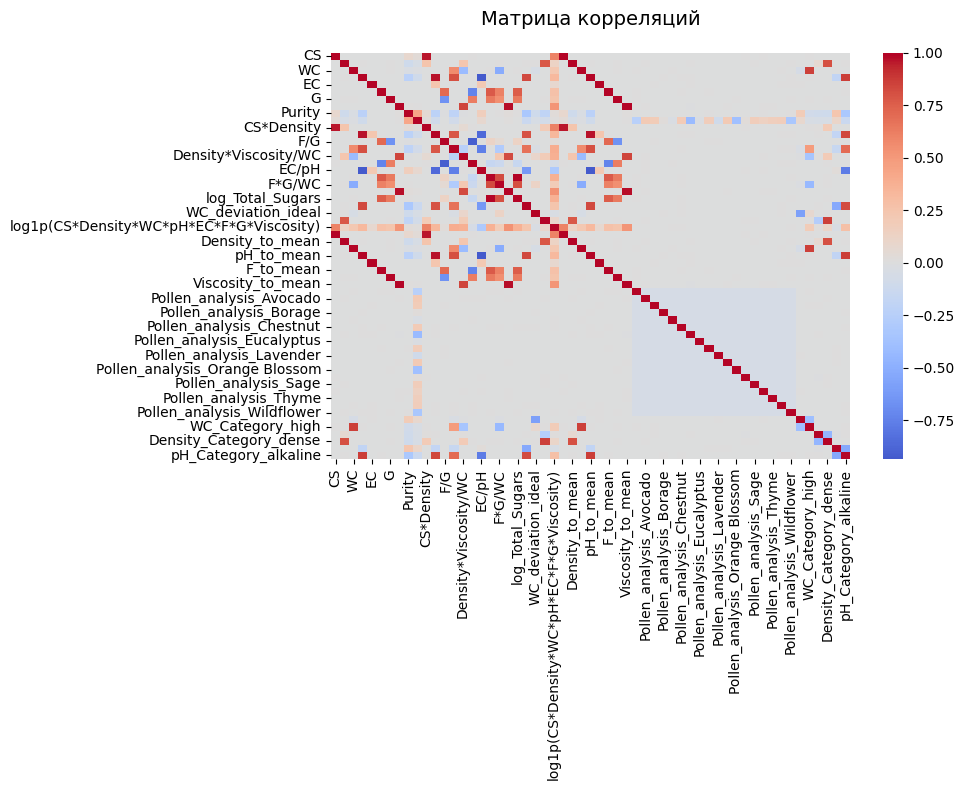

In [16]:
new_honey_df = create_num_features(honey_df)
new_honey_df = create_cat_features(new_honey_df)

corr_matrix = new_honey_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Матрица корреляций', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

Посмотрим на результат после создания новых фич

In [17]:
from sklearn.discriminant_analysis import StandardScaler


honey_X = new_honey_df.drop(['Purity', 'Price'], axis=1)
honey_y = new_honey_df[['Purity', 'Price']]

scaler = StandardScaler()
honey_X = scaler.fit_transform(honey_X)

honey_X_train, honey_X_test, honey_y_train, honey_y_test = train_test_split(
    honey_X,
    honey_y,
    test_size=0.2,
    random_state=42
)

Кросс-валидация

In [18]:
scoring = {
    'neg_mse': 'neg_mean_squared_error',
    'neg_rmse': 'neg_root_mean_squared_error', 
    'neg_mae': 'neg_mean_absolute_error',   
    'r2' : 'r2',  
}

model = LinearRegression()

results = {}

for model_name in ['Purity', 'Price']:
    cv_results = cross_validate(
        model,
        honey_X_train,
        honey_y_train[model_name],
        return_estimator=True,
        scoring=scoring,
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    results[model_name] = cv_results
    results_df = pd.DataFrame(cv_results)
    print(f"\nРезультаты кросс-валидации для {model_name} модели:")
    print(results_df)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Результаты кросс-валидации для Purity модели:
   fit_time  score_time           estimator  test_neg_mse  test_neg_rmse  \
0  0.672295    0.005894  LinearRegression()     -0.011873      -0.108961   
1  0.675405    0.005502  LinearRegression()     -0.011837      -0.108800   
2  1.142670    0.005733  LinearRegression()     -0.011880      -0.108995   
3  1.134405    0.006777  LinearRegression()     -0.011827      -0.108753   
4  1.130469    0.006402  LinearRegression()     -0.011910      -0.109132   

   test_neg_mae   test_r2  
0     -0.092185  0.389445  
1     -0.092112  0.391446  
2     -0.092336  0.392415  
3     -0.092016  0.391570  
4     -0.092304  0.385388  

Результаты кросс-валидации для Price модели:
   fit_time  score_time           estimator  test_neg_mse  test_neg_rmse  \
0  1.979115    0.010078  LinearRegression()  -7458.479404     -86.362488   
1  1.986665    0.010349  LinearRegression()  -7417.911242     -86.127297   
2  1.987357    0.008055  LinearRegression()  -7520.095

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished


Замерим результат на тестовой выборке

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

preds = {}

for model_name in ['Purity', 'Price']:
    all_preds = []
    for model in results[model_name]['estimator']:
        pred = model.predict(honey_X_test)
        all_preds.append(pred)
    preds[model_name] = np.mean(all_preds, axis=0)
    
print("Test_score Purity:")
print('r2:', r2_score(honey_y_test['Purity'], preds['Purity']))
print('mse:', mean_squared_error(honey_y_test['Purity'], preds['Purity']))
print('rmse:', np.sqrt(mean_squared_error(honey_y_test['Purity'], preds['Purity'])))
print('mae:', mean_absolute_error(honey_y_test['Purity'], preds['Purity']))

print("\nTest_score Price:")
print('r2:', r2_score(honey_y_test['Price'], preds['Price']))
print('mse:', mean_squared_error(honey_y_test['Price'], preds['Price']))
print('rmse:', np.sqrt(mean_squared_error(honey_y_test['Price'], preds['Price'])))
print('mae:', mean_absolute_error(honey_y_test['Price'], preds['Price']))

Test_score Purity:
r2: 0.39267348755237075
mse: 0.011763374503188056
rmse: 0.10845909138098131
mae: 0.0917345037526203

Test_score Price:
r2: 0.8637591528956279
mse: 7413.975967672656
rmse: 86.10444801328592
mae: 70.62867284499394


| Метрика         | Purity (Чистота)               | Price (Цена)                 |
|-----------------|--------------------------------|------------------------------|
| R² (коэффициент детерминации) | 0.39267                       | 0.86376                      |
| MSE (среднеквадратическая ошибка) | 0.01176                 | 7413.98                      |
| RMSE (корень из MSE)      | 0.10846                       | 86.10445                     |
| MAE (средняя абсолютная ошибка)  | 0.09173                       | 70.62867                     |

Попробуем еще улучшить, подобрав гиперпараметры

In [20]:

import optuna
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import cross_val_score

def find_best_hyperparameters_cv(X, y, n_trials=10, cv=5, scoring='r2', n_jobs=-1):
    def objective(trial):
        model_type = trial.suggest_categorical('model_type', ['linear', 'ridge', 'lasso', 'elasticnet'])
        if model_type == 'linear':
            model = LinearRegression()
        elif model_type == 'ridge':
            alpha = trial.suggest_float('alpha_ridge', 0.01, 10.0, log=True)
            model = Ridge(alpha=alpha, random_state=42)
        elif model_type == 'lasso':
            alpha = trial.suggest_float('alpha_lasso', 0.001, 1.0, log=True)
            model = Lasso(alpha=alpha, random_state=42)
        elif model_type == 'elasticnet':
            alpha = trial.suggest_float('alpha_elastic', 0.001, 1.0, log=True)
            l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)
            model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        
        
        return cross_val_score(model, X, y, cv=cv, scoring=scoring).mean()
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials, show_progress_bar=True)
    
    return study.best_params


best_params = {
    'Purity': {'model_type': 'ridge', 'alpha_ridge': 3.3175747921002885},
    'Price': {'model_type': 'ridge', 'alpha_ridge': 7.468574569271231}
}

best_models = {}

for model_name in ['Purity', 'Price']:
    if not best_params.get(model_name):
        best_params[model_name] = find_best_hyperparameters_cv(
                honey_X_train,
                honey_y_train[model_name],
                n_trials=10,
                cv=5,
                scoring='neg_mean_absolute_error'
        )
    if not best_models.get(model_name):
        if best_params[model_name]['model_type'] == 'linear':
            best_models[model_name] = LinearRegression()
        elif best_params[model_name]['model_type'] == 'ridge':
            best_models[model_name] = Ridge(
                alpha=best_params[model_name]['alpha_ridge'],
                random_state=42
            )
        elif best_params[model_name]['model_type'] == 'lasso':
            best_models[model_name] = Lasso(
                alpha=best_params[model_name]['alpha_lasso'],
                random_state=42
            )
        elif best_params[model_name]['model_type'] == 'elasticnet':
            best_models[model_name] = ElasticNet(
                alpha=best_params[model_name]['alpha_elastic'],
                l1_ratio=best_params['l1_ratio'],
                random_state=42
            )
        
        
        
        

/home/jonaj/StudyDir/AI_LABS/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Обучим модель с подобранными гиперпараметрами

In [21]:
scoring = {
    'neg_mse': 'neg_mean_squared_error',
    'neg_rmse': 'neg_root_mean_squared_error', 
    'neg_mae': 'neg_mean_absolute_error',   
    'r2' : 'r2',  
}

results = {}


for model_name, model in best_models.items():
    cv_results = cross_validate(
        model,
        honey_X_train,
        honey_y_train[model_name],
        return_estimator=True,
        scoring=scoring,
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    results[model_name] = cv_results
    
    results_df = pd.DataFrame(cv_results)
    print(f"\nРезультаты кросс-валидации для {model_name} модели:")
    print(results_df)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Результаты кросс-валидации для Purity модели:
   fit_time  score_time                                         estimator  \
0  0.218485    0.005140  Ridge(alpha=3.3175747921002885, random_state=42)   
1  0.213221    0.005343  Ridge(alpha=3.3175747921002885, random_state=42)   
2  0.223432    0.005130  Ridge(alpha=3.3175747921002885, random_state=42)   
3  0.220937    0.005003  Ridge(alpha=3.3175747921002885, random_state=42)   
4  0.216693    0.003832  Ridge(alpha=3.3175747921002885, random_state=42)   

   test_neg_mse  test_neg_rmse  test_neg_mae   test_r2  
0     -0.011873      -0.108962     -0.092184  0.389442  
1     -0.011837      -0.108799     -0.092110  0.391451  
2     -0.011880      -0.108996     -0.092335  0.392411  
3     -0.011827      -0.108753     -0.092014  0.391574  
4     -0.011910      -0.109132     -0.092303  0.385386  

Результаты кросс-валидации для Price модели:
   fit_time  score_time                                        estimator  \
0  0.231106    0.008321  R

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


Замерим на тестовой выборке

In [22]:
preds = {}

for model_name in ['Purity', 'Price']:
    all_preds = []
    for model in results[model_name]['estimator']:
        pred = model.predict(honey_X_test)
        all_preds.append(pred)
    preds[model_name] = np.mean(all_preds, axis=0)
    
print("Test_score Purity:")
print('r2:', r2_score(honey_y_test['Purity'], preds['Purity']))
print('mse:', mean_squared_error(honey_y_test['Purity'], preds['Purity']))
print('rmse:', np.sqrt(mean_squared_error(honey_y_test['Purity'], preds['Purity'])))
print('mae:', mean_absolute_error(honey_y_test['Purity'], preds['Purity']))

print("\nTest_score Price:")
print('r2:', r2_score(honey_y_test['Price'], preds['Price']))
print('mse:', mean_squared_error(honey_y_test['Price'], preds['Price']))
print('rmse:', np.sqrt(mean_squared_error(honey_y_test['Price'], preds['Price'])))
print('mae:', mean_absolute_error(honey_y_test['Price'], preds['Price']))
    

Test_score Purity:
r2: 0.39268024896115905
mse: 0.011763243540712164
rmse: 0.10845848763795374
mae: 0.09173276670383476

Test_score Price:
r2: 0.86376270847122
mse: 7413.782479797682
rmse: 86.10332444103237
mae: 70.62463143716113


| Метрика         | Purity (Чистота)               | Price (Цена)                 |
|-----------------|--------------------------------|------------------------------|
| R² (коэффициент детерминации) | 0.39268                       | 0.86376                      |
| MSE (среднеквадратическая ошибка) | 0.01176                 | 7413.78                      |
| RMSE (корень из MSE)      | 0.10846                       | 86.10332                     |
| MAE (средняя абсолютная ошибка)  | 0.09173                       | 70.62463                     |

### 4.  Имплементация алгоритма машинного обучения 

4.1. Задача регрессии

In [23]:
from abc import ABC, abstractmethod
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted


class BaseLabLinearModel(BaseEstimator, RegressorMixin, ABC):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        
    def _preprocess_data(self, X, y=None):
        if self.copy_X:
            X = X.copy()
        
        if self.normalize:
            if not hasattr(self, 'scaler_'):
                self.scaler_ = StandardScaler()
                X = self.scaler_.fit_transform(X)
            else:
                X = self.scaler_.transform(X)
        
        if self.fit_intercept:
            X = np.hstack([np.ones((X.shape[0], 1)), X])
            
        return X
    
    @abstractmethod
    def _compute_coef(self, X, y):
        ...
        
    def fit(self, X, y):
        X, y = check_X_y(X, y, y_numeric=True)
        X = self._preprocess_data(X)
        
        self.coef_ = self._compute_coef(X, y)
        
        if self.fit_intercept:
            self.intercept_ = self.coef_[0]
            self.coef_ = self.coef_[1:]
        else:
            self.intercept_ = 0.0
            
        self.n_features_in_ = X.shape[1] - (1 if self.fit_intercept else 0)
        self.n_samples_ = X.shape[0]
        
        return self
    
    def predict(self, X):
        check_is_fitted(self, 'coef_')
        X = check_array(X)
        
        X = self._preprocess_data(X)
        
        if self.fit_intercept:
            return X @ np.hstack([self.intercept_, self.coef_])
        else:
            return X @ self.coef_

        
class LabLinearRegression(BaseLabLinearModel):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True):
        super().__init__(fit_intercept=fit_intercept, normalize=normalize, copy_X=copy_X)
        
    def _compute_coef(self, X, y):
        coef = np.linalg.pinv(X.T @ X) @ X.T @ y
        return coef


class LabRidge(BaseLabLinearModel):
    def __init__(self, alpha=1.0, fit_intercept=True, normalize=False, copy_X=True):
        super().__init__(fit_intercept=fit_intercept, normalize=normalize, copy_X=copy_X)
        self.alpha = alpha
    
    def _compute_coef(self, X, y):
        n_features = X.shape[1]
        reg_matrix = X.T @ X + self.alpha * np.eye(n_features)
        coef = np.linalg.pinv(reg_matrix) @ X.T @ y
        return coef


class LabLasso(BaseLabLinearModel):
    def __init__(self, alpha=1.0, max_iter=1000, tol=1e-4, 
                 fit_intercept=True, normalize=False, copy_X=True):
        super().__init__(fit_intercept=fit_intercept, normalize=normalize, copy_X=copy_X)
        self.alpha = alpha
        self.max_iter = max_iter
        self.tol = tol
        
    def _soft_threshold(self, x, threshold):
        return np.sign(x) * np.maximum(np.abs(x) - threshold, 0)
    
    def _compute_coef(self, X, y):
        n_samples, n_features = X.shape
        coef = np.zeros(n_features)
        
        X_squared = np.sum(X ** 2, axis=0)
        
        for _ in range(self.max_iter):
            coef_old = coef.copy()
            
            for j in range(n_features):
                y_pred = X @ coef
                r = y - y_pred + X[:, j] * coef[j]
                
                z = X[:, j] @ r
                coef[j] = self._soft_threshold(z, self.alpha * n_samples) / (X_squared[j] + 1e-10)
            
            if np.max(np.abs(coef - coef_old)) < self.tol:
                break
                
        return coef
        
        
class LabElasticNet(BaseLabLinearModel):
    def __init__(self, alpha=1.0, l1_ratio=0.5, max_iter=1000, tol=1e-4,
                 fit_intercept=True, normalize=False, copy_X=True):
        super().__init__(fit_intercept=fit_intercept, normalize=normalize, copy_X=copy_X)
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.max_iter = max_iter
        self.tol = tol
    
    def _soft_threshold(self, x, threshold):
        return np.sign(x) * np.maximum(np.abs(x) - threshold, 0)   
    
    def _compute_coef(self, X, y):
        n_samples, n_features = X.shape
        coef = np.zeros(n_features)
        
        alpha_l1 = self.alpha * self.l1_ratio
        alpha_l2 = self.alpha * (1 - self.l1_ratio)
        
        X_squared = np.sum(X ** 2, axis=0)
        
        for _ in range(self.max_iter):
            coef_old = coef.copy()
            
            for j in range(n_features):
                y_pred = X @ coef
                r = y - y_pred + X[:, j] * coef[j]
                
                z = X[:, j] @ r
                coef[j] = self._soft_threshold(z, alpha_l1 * n_samples) / (X_squared[j] + alpha_l2 * n_samples + 1e-10)
            
            if np.max(np.abs(coef - coef_old)) < self.tol:
                break
                
        return coef 

1. Простой бейзлайн

In [24]:
honey_X = onehot_honey_df.drop(['Purity', 'Price'], axis=1)
honey_y = onehot_honey_df[['Purity', 'Price']]
honey_X_train, honey_X_test, honey_y_train, honey_y_test = train_test_split(
    honey_X,
    honey_y,
    test_size=0.2,
    random_state=42
)

Кросс-валидация

In [25]:
scoring = {
    'neg_mse': 'neg_mean_squared_error',
    'neg_rmse': 'neg_root_mean_squared_error', 
    'neg_mae': 'neg_mean_absolute_error',   
    'r2' : 'r2',  
}

model = LabLinearRegression()

results = {}

for model_name in ['Purity', 'Price']:
    cv_results = cross_validate(
        model,
        honey_X_train,
        honey_y_train[model_name],
        return_estimator=True,
        scoring=scoring,
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    results[model_name] = cv_results
    results_df = pd.DataFrame(cv_results)
    print(f"\nРезультаты кросс-валидации для {model_name} модели:")
    print(results_df)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Результаты кросс-валидации для Purity модели:
   fit_time  score_time              estimator  test_neg_mse  test_neg_rmse  \
0  0.177620    0.044303  LabLinearRegression()     -0.018076      -0.134447   
1  0.174347    0.041949  LabLinearRegression()     -0.018014      -0.134218   
2  0.186355    0.034619  LabLinearRegression()     -0.018151      -0.134724   
3  0.191489    0.031400  LabLinearRegression()     -0.018045      -0.134331   
4  0.186269    0.025547  LabLinearRegression()     -0.017993      -0.134140   

   test_neg_mae   test_r2  
0     -0.119016  0.070434  
1     -0.118836  0.073881  
2     -0.119503  0.071708  
3     -0.119047  0.071720  
4     -0.118690  0.071429  

Результаты кросс-валидации для Price модели:
   fit_time  score_time              estimator  test_neg_mse  test_neg_rmse  \
0  0.165577    0.045302  LabLinearRegression() -10687.608502    -103.380890   
1  0.189075    0.036475  LabLinearRegression() -10665.301265    -103.272945   
2  0.182791    0.032709  La

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


Посмотрим результат на тестовой выборке, усреднив результат всех моделей

In [26]:
preds = {}

for model_name in ['Purity', 'Price']:
    all_preds = []
    for model in results[model_name]['estimator']:
        pred = model.predict(honey_X_test)
        all_preds.append(pred)
    preds[model_name] = np.mean(all_preds, axis=0)
    
print("Test_score Purity:")
print('r2:', r2_score(honey_y_test['Purity'], preds['Purity']))
print('mse:', mean_squared_error(honey_y_test['Purity'], preds['Purity']))
print('rmse:', np.sqrt(mean_squared_error(honey_y_test['Purity'], preds['Purity'])))
print('mae:', mean_absolute_error(honey_y_test['Purity'], preds['Purity']))

print("\nTest_score Price:")
print('r2:', r2_score(honey_y_test['Price'], preds['Price']))
print('mse:', mean_squared_error(honey_y_test['Price'], preds['Price']))
print('rmse:', np.sqrt(mean_squared_error(honey_y_test['Price'], preds['Price'])))
print('mae:', mean_absolute_error(honey_y_test['Price'], preds['Price']))

Test_score Purity:
r2: 0.07336654017392186
mse: 0.017948066141866274
rmse: 0.13397039278089123
mae: 0.1184015030311371

Test_score Price:
r2: 0.8049028089423564
mse: 10616.829802545999
rmse: 103.03800173987266
mae: 85.8954131103364


| Метрика         | Purity (Чистота)               | Price (Цена)                 |
|-----------------|--------------------------------|------------------------------|
| R² (коэффициент детерминации) | 0.07337                       | 0.80490                      |
| MSE (среднеквадратическая ошибка) | 0.01795                 | 10616.83                     |
| RMSE (корень из MSE)      | 0.13397                       | 103.03800                    |
| MAE (средняя абсолютная ошибка)  | 0.11840                       | 85.89541                     |

Улучшим бейзлайн

In [27]:
new_honey_df = create_num_features(honey_df)
new_honey_df = create_cat_features(new_honey_df)

honey_X = new_honey_df.drop(['Purity', 'Price'], axis=1)
honey_y = new_honey_df[['Purity', 'Price']]

scaler = StandardScaler()
honey_X = scaler.fit_transform(honey_X)

honey_X_train, honey_X_test, honey_y_train, honey_y_test = train_test_split(
    honey_X,
    honey_y,
    test_size=0.2,
    random_state=42
)

Посмотрим, что получилось после создания новых фич и применения StandardScaler

In [28]:
scoring = {
    'neg_mse': 'neg_mean_squared_error',
    'neg_rmse': 'neg_root_mean_squared_error', 
    'neg_mae': 'neg_mean_absolute_error',   
    'r2' : 'r2',  
}

model = LabLinearRegression()

results = {}

for model_name in ['Purity', 'Price']:
    cv_results = cross_validate(
        model,
        honey_X_train,
        honey_y_train[model_name],
        return_estimator=True,
        scoring=scoring,
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    results[model_name] = cv_results
    results_df = pd.DataFrame(cv_results)
    print(f"\nРезультаты кросс-валидации для {model_name} модели:")
    print(results_df)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Результаты кросс-валидации для Purity модели:
   fit_time  score_time              estimator  test_neg_mse  test_neg_rmse  \
0  0.298455    0.039626  LabLinearRegression()     -0.011873      -0.108961   
1  0.323937    0.033119  LabLinearRegression()     -0.011837      -0.108800   
2  0.332963    0.027096  LabLinearRegression()     -0.011880      -0.108995   
3  0.334811    0.019789  LabLinearRegression()     -0.011827      -0.108753   
4  0.336591    0.012381  LabLinearRegression()     -0.011910      -0.109132   

   test_neg_mae   test_r2  
0     -0.092185  0.389445  
1     -0.092112  0.391446  
2     -0.092336  0.392415  
3     -0.092016  0.391570  
4     -0.092304  0.385388  

Результаты кросс-валидации для Price модели:
   fit_time  score_time              estimator  test_neg_mse  test_neg_rmse  \
0  0.264282    0.038957  LabLinearRegression()  -7458.479404     -86.362488   
1  0.272690    0.033084  LabLinearRegression()  -7417.911242     -86.127297   
2  0.292207    0.020217  La

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished


Посмотрим результат на тестовой выборке, усреднив результат всех моделей

In [29]:
preds = {}

for model_name in ['Purity', 'Price']:
    all_preds = []
    for model in results[model_name]['estimator']:
        pred = model.predict(honey_X_test)
        all_preds.append(pred)
    preds[model_name] = np.mean(all_preds, axis=0)
    
print("Test_score Purity:")
print('r2:', r2_score(honey_y_test['Purity'], preds['Purity']))
print('mse:', mean_squared_error(honey_y_test['Purity'], preds['Purity']))
print('rmse:', np.sqrt(mean_squared_error(honey_y_test['Purity'], preds['Purity'])))
print('mae:', mean_absolute_error(honey_y_test['Purity'], preds['Purity']))

print("\nTest_score Price:")
print('r2:', r2_score(honey_y_test['Price'], preds['Price']))
print('mse:', mean_squared_error(honey_y_test['Price'], preds['Price']))
print('rmse:', np.sqrt(mean_squared_error(honey_y_test['Price'], preds['Price'])))
print('mae:', mean_absolute_error(honey_y_test['Price'], preds['Price']))

Test_score Purity:
r2: 0.39267348755237086
mse: 0.011763374503188054
rmse: 0.10845909138098131
mae: 0.09173450375262025

Test_score Price:
r2: 0.8637591528956279
mse: 7413.975967672656
rmse: 86.10444801328592
mae: 70.62867284499397


| Метрика         | Purity (Чистота)               | Price (Цена)                 |
|-----------------|--------------------------------|------------------------------|
| R² (коэффициент детерминации) | 0.39267                       | 0.86376                      |
| MSE (среднеквадратическая ошибка) | 0.01176                 | 7413.98                      |
| RMSE (корень из MSE)      | 0.10846                       | 86.10445                     |
| MAE (средняя абсолютная ошибка)  | 0.09173                       | 70.62867                     |

Попробуем еще улучшить, подобрав гиперпараметры

In [30]:
def find_best_hyperparameters_cv(X, y, n_trials=10, cv=5, scoring='r2', n_jobs=-1):
    def objective(trial):
        model_type = trial.suggest_categorical('model_type', ['linear', 'ridge', 'lasso', 'elasticnet'])
        if model_type == 'linear':
            model = LabLinearRegression()
        elif model_type == 'ridge':
            alpha = trial.suggest_float('alpha_ridge', 0.01, 10.0, log=True)
            model = LabRidge(alpha=alpha)
        elif model_type == 'lasso':
            alpha = trial.suggest_float('alpha_lasso', 0.001, 1.0, log=True)
            model = LabLasso(alpha=alpha)
        elif model_type == 'elasticnet':
            alpha = trial.suggest_float('alpha_elastic', 0.001, 1.0, log=True)
            l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)
            model = LabElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        
        
        return cross_val_score(model, X, y, cv=cv, scoring=scoring).mean()
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials, show_progress_bar=True)
    
    return study.best_params


best_params = {
    'Purity': {'model_type': 'ridge', 'alpha_ridge': 3.3175747921002885},
    'Price': {'model_type': 'ridge', 'alpha_ridge': 7.468574569271231}
}

best_models = {}

for model_name in ['Purity', 'Price']:
    if not best_params.get(model_name):
        best_params[model_name] = find_best_hyperparameters_cv(
                honey_X_train,
                honey_y_train[model_name],
                n_trials=10,
                cv=5,
                scoring='neg_mean_absolute_error'
        )
    if not best_models.get(model_name):
        if best_params[model_name]['model_type'] == 'linear':
            best_models[model_name] = LabLinearRegression()
        elif best_params[model_name]['model_type'] == 'ridge':
            best_models[model_name] = LabRidge(
                alpha=best_params[model_name]['alpha_ridge'],
                
            )
        elif best_params[model_name]['model_type'] == 'lasso':
            best_models[model_name] = LabLasso(
                alpha=best_params[model_name]['alpha_lasso'],
                
            )
        elif best_params[model_name]['model_type'] == 'elasticnet':
            best_models[model_name] = LabElasticNet(
                alpha=best_params[model_name]['alpha_elastic'],
                l1_ratio=best_params['l1_ratio'],
                
            )

Обучим модель с подобранными гиперпараметрами

In [31]:
scoring = {
    'neg_mse': 'neg_mean_squared_error',
    'neg_rmse': 'neg_root_mean_squared_error', 
    'neg_mae': 'neg_mean_absolute_error',   
    'r2' : 'r2',  
}

results = {}


for model_name, model in best_models.items():
    cv_results = cross_validate(
        model,
        honey_X_train,
        honey_y_train[model_name],
        return_estimator=True,
        scoring=scoring,
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    results[model_name] = cv_results
    
    results_df = pd.DataFrame(cv_results)
    print(f"\nРезультаты кросс-валидации для {model_name} модели:")
    print(results_df)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



Результаты кросс-валидации для Purity модели:
   fit_time  score_time                           estimator  test_neg_mse  \
0  0.312614    0.040447  LabRidge(alpha=3.3175747921002885)     -0.011873   
1  0.318408    0.041798  LabRidge(alpha=3.3175747921002885)     -0.011837   
2  0.334296    0.033502  LabRidge(alpha=3.3175747921002885)     -0.011880   
3  0.324627    0.027597  LabRidge(alpha=3.3175747921002885)     -0.011827   
4  0.332518    0.016238  LabRidge(alpha=3.3175747921002885)     -0.011910   

   test_neg_rmse  test_neg_mae   test_r2  
0      -0.108962     -0.092182  0.389442  
1      -0.108799     -0.092109  0.391452  
2      -0.108996     -0.092334  0.392411  
3      -0.108753     -0.092013  0.391574  
4      -0.109132     -0.092302  0.385385  

Результаты кросс-валидации для Price модели:
   fit_time  score_time                          estimator  test_neg_mse  \
0  0.287405    0.042038  LabRidge(alpha=7.468574569271231)  -7458.531679   
1  0.303019    0.034115  LabRidge(

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


Замерим на тестовой выборке

In [32]:
preds = {}

for model_name in ['Purity', 'Price']:
    all_preds = []
    for model in results[model_name]['estimator']:
        pred = model.predict(honey_X_test)
        all_preds.append(pred)
    preds[model_name] = np.mean(all_preds, axis=0)
    
print("Test_score Purity:")
print('r2:', r2_score(honey_y_test['Purity'], preds['Purity']))
print('mse:', mean_squared_error(honey_y_test['Purity'], preds['Purity']))
print('rmse:', np.sqrt(mean_squared_error(honey_y_test['Purity'], preds['Purity'])))
print('mae:', mean_absolute_error(honey_y_test['Purity'], preds['Purity']))

print("\nTest_score Price:")
print('r2:', r2_score(honey_y_test['Price'], preds['Price']))
print('mse:', mean_squared_error(honey_y_test['Price'], preds['Price']))
print('rmse:', np.sqrt(mean_squared_error(honey_y_test['Price'], preds['Price'])))
print('mae:', mean_absolute_error(honey_y_test['Price'], preds['Price']))

Test_score Purity:
r2: 0.3926823934804414
mse: 0.011763202003280598
rmse: 0.10845829614778484
mae: 0.09173113779757888

Test_score Price:
r2: 0.8637634706405501
mse: 7413.741003946519
rmse: 86.10308359139363
mae: 70.62256674371315


| Метрика         | Purity (Чистота)               | Price (Цена)                 |
|-----------------|--------------------------------|------------------------------|
| R² (коэффициент детерминации) | 0.39268                       | 0.86376                      |
| MSE (среднеквадратическая ошибка) | 0.01176                 | 7413.74                      |
| RMSE (корень из MSE)      | 0.10846                       | 86.10308                     |
| MAE (средняя абсолютная ошибка)  | 0.09173                       | 70.62257                     |